137.7312254325117 -3.9059972624231283 0.041455144407409106
1.8068664 0.48113602
2.3697577375804144 1.6636012823874062
137.1244165880189 -0.7496432537733215 0.07886698315403179
10.064105 0.89323413
4.281593169594808 2.4048720298317345
10.303129693398832 -0.0009477054450552735 0.0011710168921624073
0.011115176 0.004172576
-0.5705434542292815 1.3494181404930183
   metal    
------------
 0.017557677
0.0052378923
 0.017115863
 0.004112037
0.0044654375
 0.011648139
 0.007939029
         ...
0.0061457185
0.0032029229
 0.012222067
 0.012082154
 0.007912957
 0.015840244
0.0019397384
Length = 38583 rows


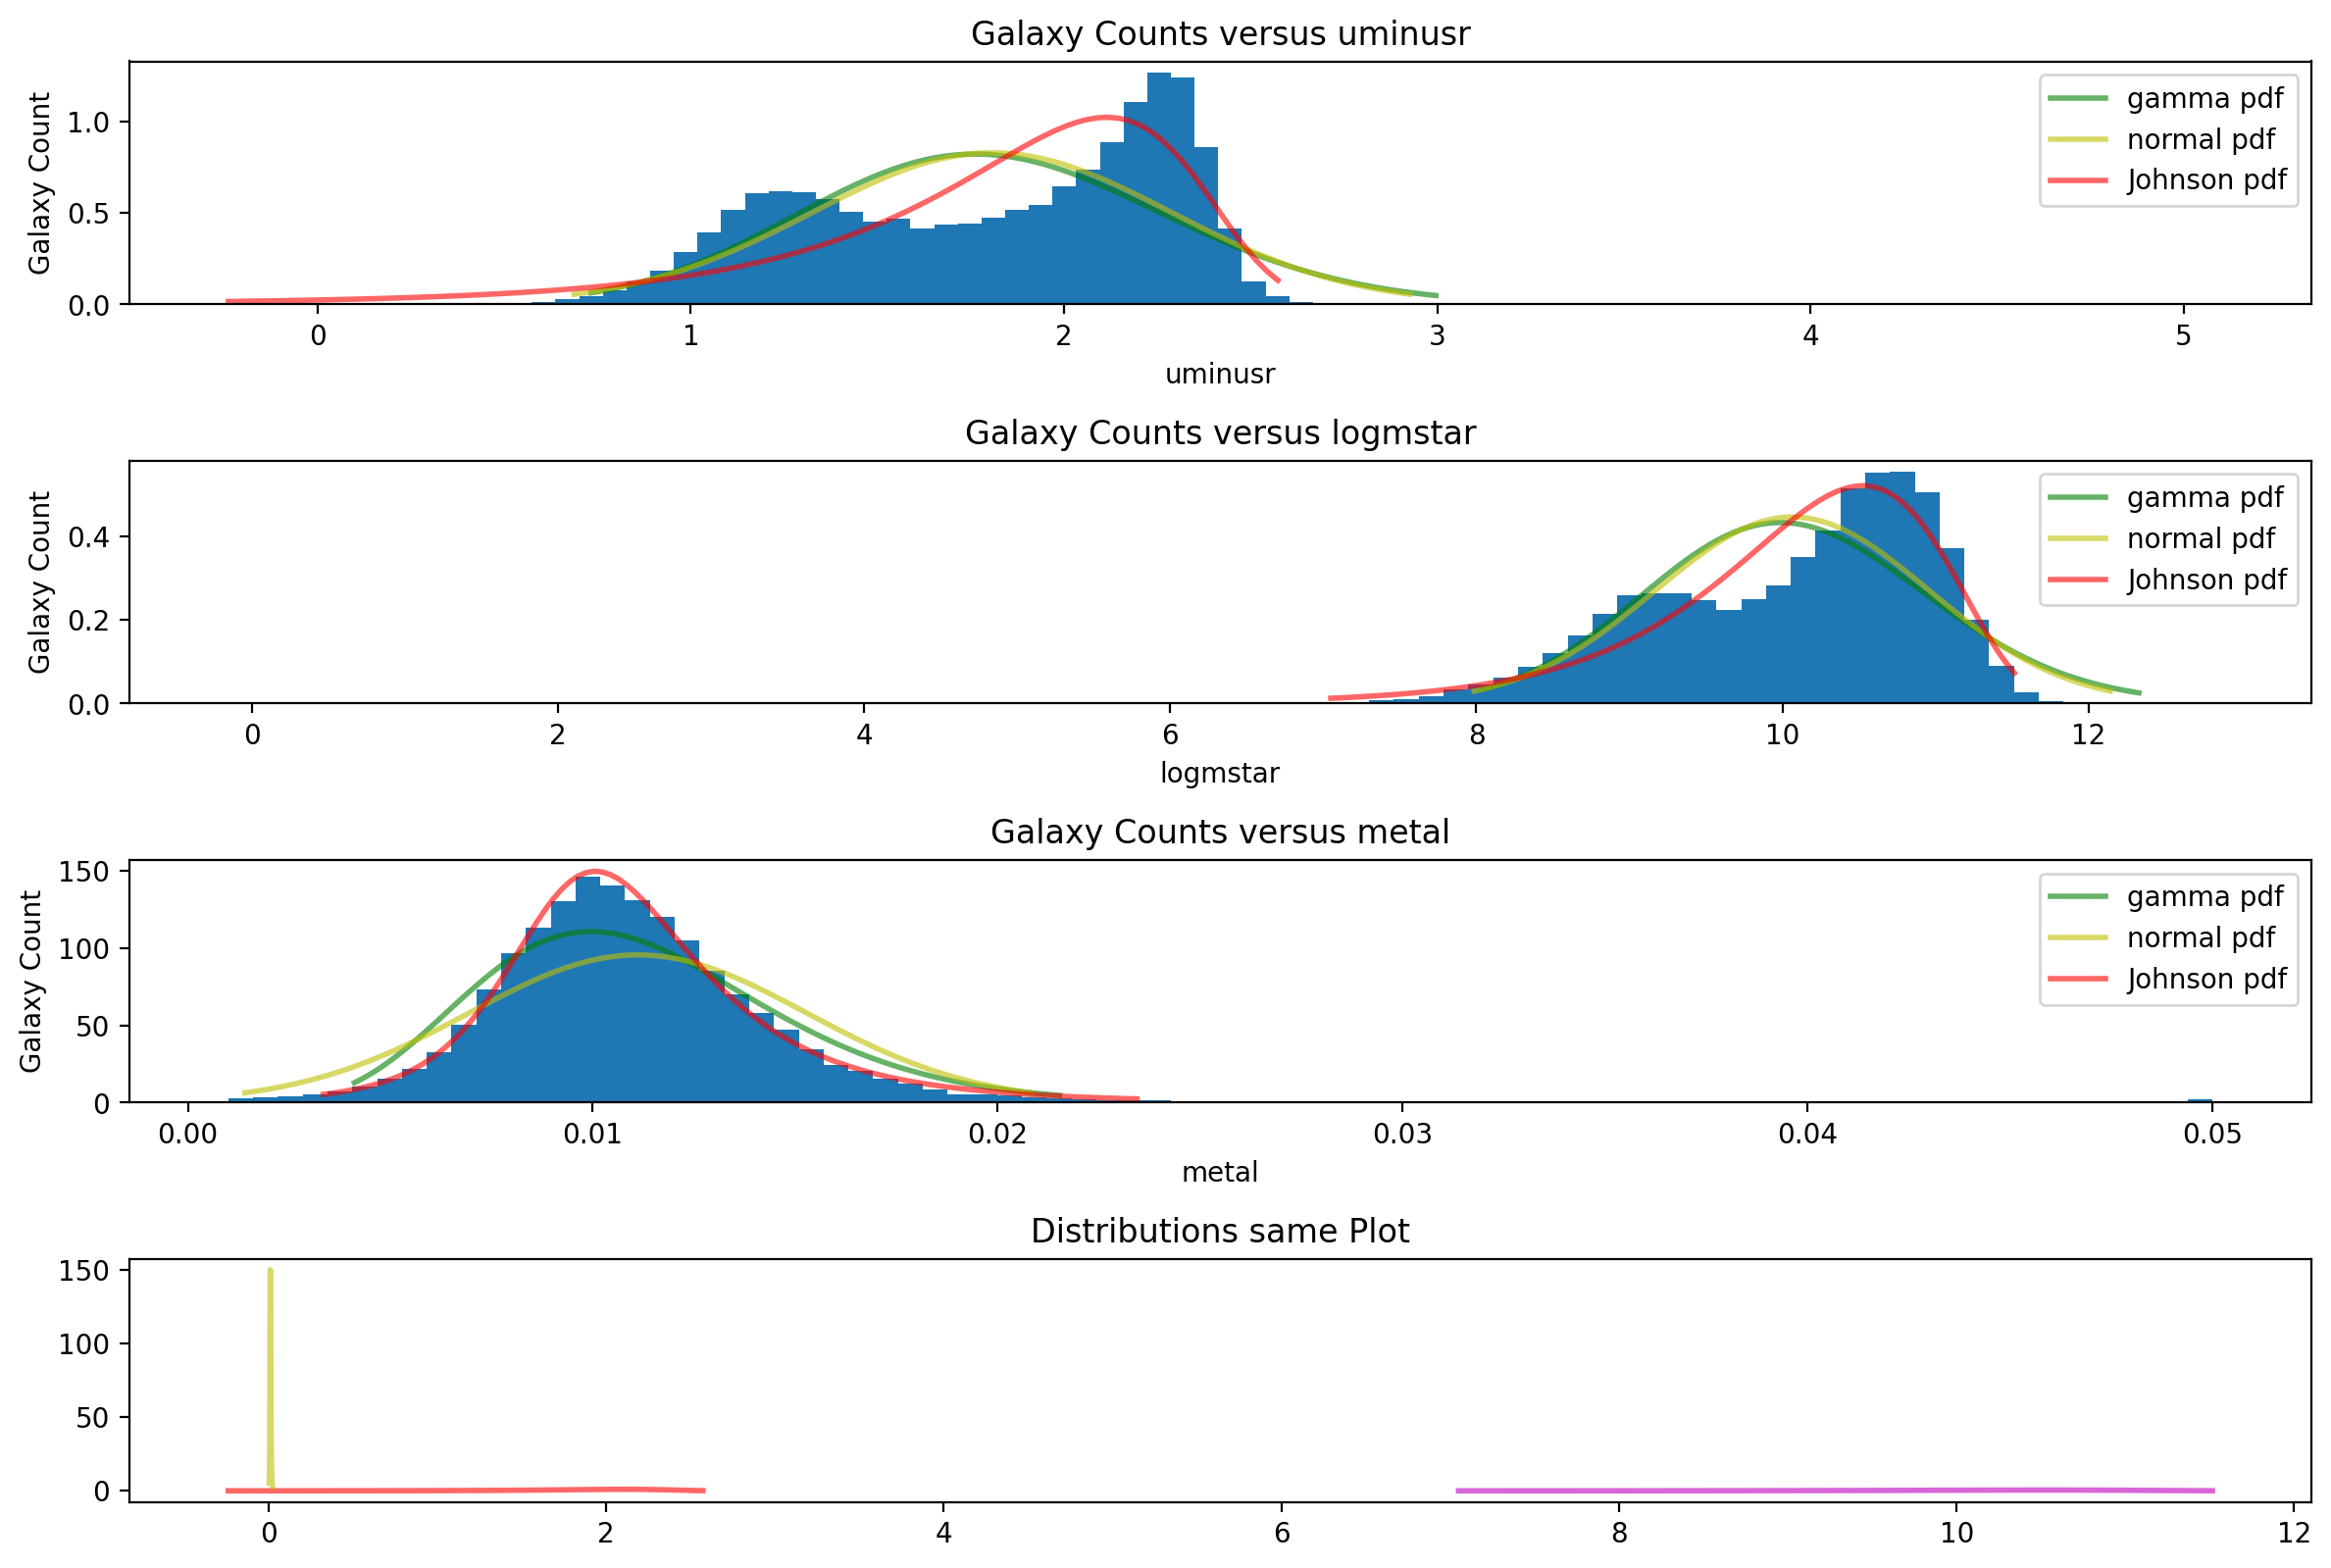

In [2]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot

#print(RawMassEClassEmeasure.colnames)
# CLEAN DATA
#RErange = Table.read('../../GAMA_Data/EMassEClassEmeasure.fits')
stellarMasses = Table.read('../../GAMA_Data/StellarMassesv19.fits')
visualMorph = Table.read('../../GAMA_Data/VisualMorphologyv03.fits')
RErange = join(visualMorph,stellarMasses,keys='CATAID',join_type='inner')
RErange = RErange[RErange['ELLIPTICAL_CODE'] == 1]
#RErange = Table.read('../../GAMA_Data/VisualMassClassEnviron.fits')
#RErange = RErange[RErange['SurfaceDensityFlag'] == 0]
#RErange = RErange[RErange['DistanceTo5nnFlag'] == 0]
#RErange = RErange[RErange['SurfaceDensity'] < 50]
#RErange = RErange[RErange['AGEDenParFlag'] == 0]
#RErange = RErange[RErange['CountInCylFlag'] == 0]
RErange = RErange[RErange['uminusr']> 0.001]
RErange = RErange[RErange['metal']> 0.001]

binCount = 80
alphaVal = .3

##### uminusr
fig = plt.figure(figsize=(12, 16), dpi=200)

#fig.suptitle('Plot - Histogram Red Galaxies for Elliptical Galaxies')
#fig.legend(loc="upper right")
#import scipy.stats as stats
from scipy import stats
xfield = 'uminusr'
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#print(counts)

ax1 = fig.add_subplot(8, 1, 1)
ax1.title.set_text('Galaxy Counts versus uminusr')
ax1.set_ylabel('Galaxy Count')
ax1.set_xlabel(xfield)
#counts, bins = np.histogram(RErange[xfield].data,bins=binCount)
#ax1.hist(bins[:-1],bins, weights=counts)

ag, bg, cg =stats.gamma.fit(RErange[xfield].data)
print(ag, bg, cg)
xg0, xg1 = stats.gamma.ppf([0.01, 0.99], ag, loc = bg, scale=cg)
xg = np.linspace(xg0,xg1,100)

an, bn =stats.norm.fit(RErange[xfield].data)
print(an, bn)
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)

aj, bj, cj, dj =stats.johnsonsu.fit(RErange[xfield].data)
print(aj, bj)
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)

ax1.plot(xg, stats.gamma.pdf(xg, ag, loc=bg, scale=cg),'g-', lw=2, alpha=0.6, label='gamma pdf')
ax1.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
ax1.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax1.hist(RErange[xfield].data, bins=binCount, density=True)
#ax1.set_xlabel(xfield)
ax1.set_xlabel('uminusr')
ax1.legend()


xfield ='logmstar'
ax2 = fig.add_subplot(8, 1, 2)
ax2.title.set_text('Galaxy Counts versus logmstar')
ax2.set_ylabel('Galaxy Count')
ax2.set_xlabel(xfield)
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#ax1.hist(bins[:-1],bins, weights=counts)

alg, blg, clg =stats.gamma.fit(RErange[xfield].data)
print(alg, blg, clg)
xlg0, xlg1 = stats.gamma.ppf([0.01, 0.99], alg, loc = blg, scale=clg)
xlg = np.linspace(xlg0,xlg1,100)

aln, bln =stats.norm.fit(RErange[xfield].data)
print(aln, bln)
xln0, xln1 = stats.norm.ppf([0.01, 0.99], aln, scale = bln)
xln = np.linspace(xln0,xln1,100)

alj, blj, clj, dlj =stats.johnsonsu.fit(RErange[xfield].data)
print(alj, blj)
xlj0, xlj1 = stats.johnsonsu.ppf([0.01, 0.99], alj, blj, loc=clj, scale=dlj)
xlj = np.linspace(xlj0,xlj1,100)

ax2.plot(xlg, stats.gamma.pdf(xlg, alg, loc=blg, scale=clg),'g-', lw=2, alpha=0.6, label='gamma pdf')
ax2.plot(xln, stats.norm.pdf(xln, aln, bln),'y-', lw=2, alpha=0.6, label='normal pdf')
ax2.plot(xlj, stats.johnsonsu.pdf(xlj, alj, blj, loc=clj, scale=dlj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax2.hist(RErange[xfield].data, bins=binCount, density=True)
#ax2.set_xlabel(xfield)
ax2.set_xlabel('logmstar')
ax2.legend()


xfield ='metal'
ax3 = fig.add_subplot(8, 1, 3)
ax3.title.set_text('Galaxy Counts versus metal')
ax3.set_ylabel('Galaxy Count')
ax3.set_xlabel(xfield)
#counts, bins = np.histogram(RErange1[xfield].data,bins=binCount)
#ax1.hist(bins[:-1],bins, weights=counts)

amg, bmg, cmg =stats.gamma.fit(RErange[xfield].data)
print(amg, bmg, cmg)
xmg0, xmg1 = stats.gamma.ppf([0.01, 0.99], amg, loc = bmg, scale=cmg)
xmg = np.linspace(xmg0,xmg1,100)

amn, bmn =stats.norm.fit(RErange[xfield].data)
print(amn, bmn)
xmn0, xmn1 = stats.norm.ppf([0.01, 0.99], amn, scale = bmn)
xmn = np.linspace(xmn0,xmn1,100)

amj, bmj, cmj, dmj =stats.johnsonsu.fit(RErange[xfield].data)
print(amj, bmj)
xmj0, xmj1 = stats.johnsonsu.ppf([0.01, 0.99], amj, bmj, loc=cmj, scale=dmj)
xmj = np.linspace(xmj0,xmj1,100)

print(RErange[xfield])
ax3.plot(xmg, stats.gamma.pdf(xmg, amg, loc=bmg, scale=cmg),'g-', lw=2, alpha=0.6, label='gamma pdf')
ax3.plot(xmn, stats.norm.pdf(xmn, amn, bmn),'y-', lw=2, alpha=0.6, label='normal pdf')
ax3.plot(xmj, stats.johnsonsu.pdf(xmj, amj, bmj, loc=cmj, scale=dmj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax3.hist(RErange[xfield].data, bins=binCount, density=True)
#a3.set_xlabel(xfield)
ax3.set_xlabel('metal')
ax3.legend()

ax4 = fig.add_subplot(8, 1, 4)
ax4.title.set_text('Distributions same Plot')

ax4.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='uminusr pdf')
ax4.plot(xlj, stats.johnsonsu.pdf(xlj, alj, blj, loc=clj, scale=dlj),'m-', lw=2, alpha=0.6, label='logmstar pdf')
ax4.plot(xmj, stats.johnsonsu.pdf(xmj, amj, bmj, loc=cmj, scale=dmj),'y-', lw=2, alpha=0.6, label='metal pdf')





fig.tight_layout()
plt.show()




